# Ajay Kumar K P                                                  email : ajoctober06@gmail.com

# Assignment - 04 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Q.1

In [2]:
dt=pd.read_csv('delivery_time.csv')

In [3]:
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dt_new = dt.rename(columns={'Sorting Time': 'Sorting_Time','Delivery Time':'Delivery_Time'})
dt_new.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA & Visualization 

In [5]:
dt_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dt_new.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

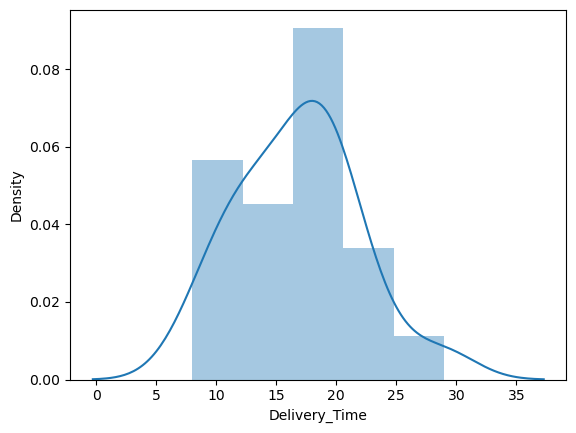

In [9]:
sns.distplot(dt_new['Delivery_Time'])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

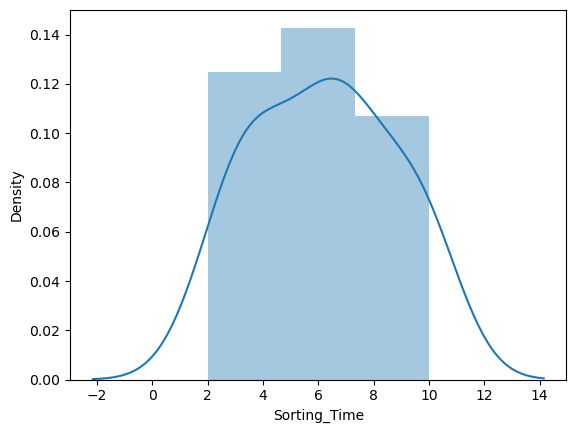

In [10]:
sns.distplot(dt_new['Sorting_Time'])

<AxesSubplot:>

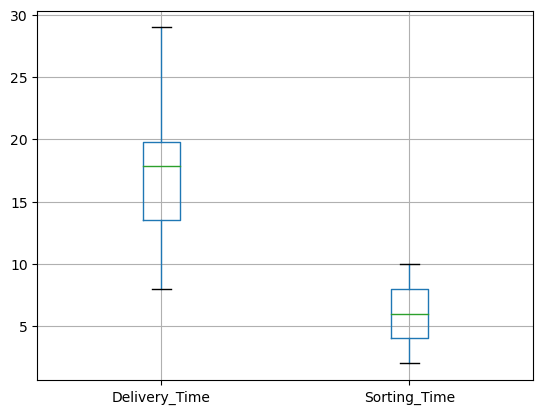

In [11]:
dt_new.boxplot()

In [12]:
dt_new.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

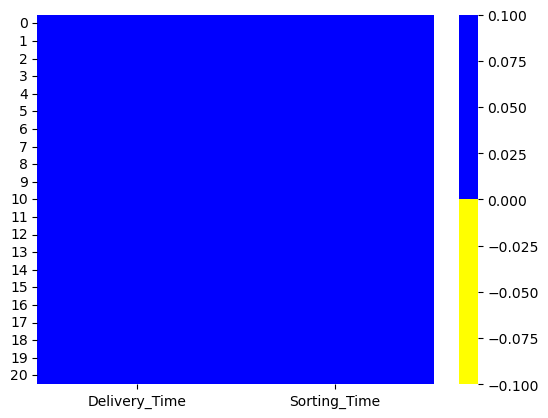

In [13]:
import seaborn as sns
cols = dt_new.columns 
colours = ['yellow', 'blue'] 
sns.heatmap(dt_new[cols].isnull(),
            cmap=sns.color_palette(colours))

# Coorelation Analysis 

In [14]:
dt_new.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


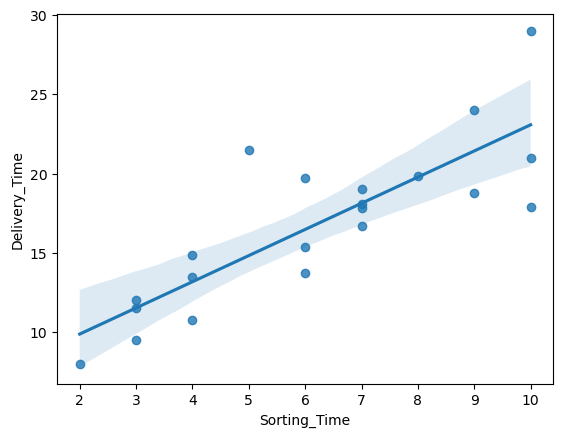

In [15]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=dt_new);

# Model Building 

In [16]:
model=smf.ols('Delivery_Time~Sorting_Time',data=dt_new).fit()

In [17]:
# parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
# finding t-values and p-values
model.tvalues,model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [19]:
# rsquared values
model.rsquared

0.6822714748417231

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        13:06:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# UsingTransformations 

# 1.logarithmic transformation

In [30]:
model_1=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=dt_new).fit()

In [31]:
model_1.rsquared

0.7109478980584187

In [32]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 08 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                           13:17:53   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model_01=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)' ,data=dt_new).fit()

In [43]:
model_01.rsquared
# model has the R-squared: 0.77 which is considered to be a good model 

0.77216134926874

In [44]:
model_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 08 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           13:23:50   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.Square root transformation 

In [45]:
model_2=smf.ols('np.sqrt(Delivery_Time)~Sorting_Time' ,data=dt_new).fit()

In [46]:
model_2.rsquared

0.704049871541756

In [47]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.704
Model:                                OLS   Adj. R-squared:                  0.688
Method:                     Least Squares   F-statistic:                     45.20
Date:                    Wed, 08 Feb 2023   Prob (F-statistic):           2.00e-06
Time:                            13:24:14   Log-Likelihood:                -6.6646
No. Observations:                      21   AIC:                             17.33
Df Residuals:                          19   BIC:                             19.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model_02=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)' ,data=dt_new).fit()

In [49]:
model_02.rsquared

0.7292011987544664

In [50]:
model_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 08 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                            13:25:43   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
dt_new["Sorting_Time_sq"]= dt_new.Sorting_Time**2
model_3=smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time_sq+Sorting_Time)",data=dt_new).fit()
model_3.rsquared

0.769245191508332

In [61]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.769
Model:                               OLS   Adj. R-squared:                  0.757
Method:                    Least Squares   F-statistic:                     63.34
Date:                   Wed, 08 Feb 2023   Prob (F-statistic):           1.81e-07
Time:                           13:39:35   Log-Likelihood:                 10.157
No. Observations:                     21   AIC:                            -16.31
Df Residuals:                         19   BIC:                            -14.23
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  1.5875      0.153     10.372      0.000       1.267       1.908
np.log(Sorting_Time_sq + Sorting_Time)     0.3267      0.041      7.959      0.000       0.241       0.413
==============================================================================
Omnibus:                        1.923   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.194
Skew:                           0.583   Prob(JB):                        0.551
Kurtosis:                       2.930   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_01.rsquared
# model has the R-squared: 0.77 which is considered to be a good model compared to all other transformations

0.77216134926874

# Delivery time predicted for sorting time

In [63]:
# Using the model: model_01 as model has the R-squared: 0.77 which is considered to be a good model 

In [64]:
sorting_t=(pd.DataFrame(dt_new,columns=['Sorting_Time']))

In [65]:
model_01.predict(sorting_t).head()

0    3.117833
1    2.570329
2    2.812603
3    3.054878
4    3.117833
dtype: float64

# Q.2

In [66]:
sh=pd.read_csv('Salary_Data.csv')
sh

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA & Visualization

In [67]:
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [68]:
sh.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Density'>

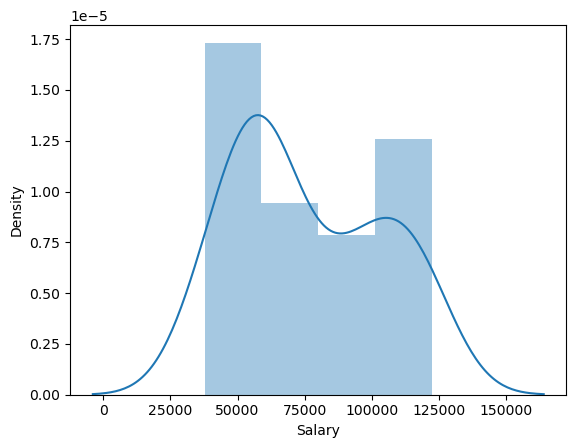

In [69]:
sns.distplot(sh['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

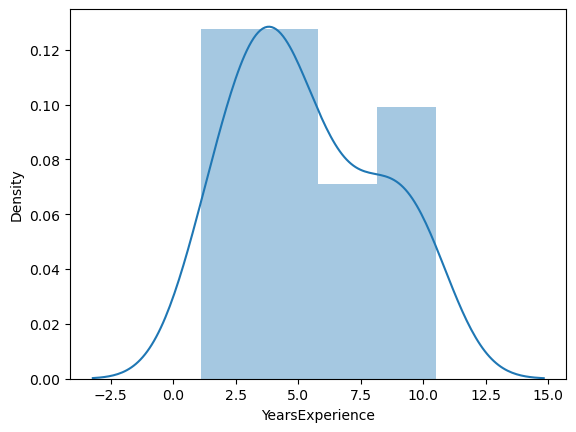

In [70]:
sns.distplot(sh['YearsExperience'])

<AxesSubplot:>

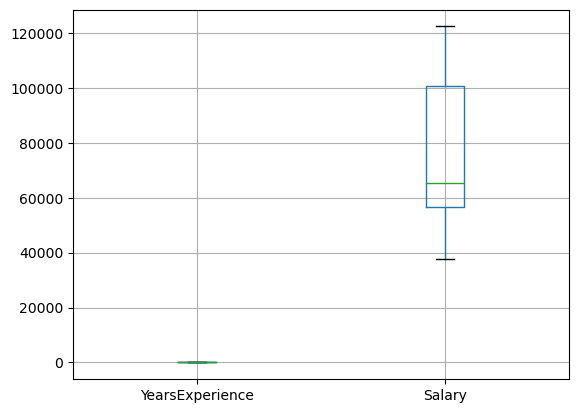

In [71]:
sh.boxplot()

In [72]:
sh.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

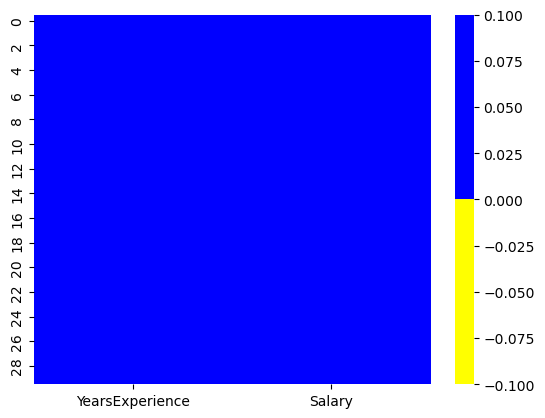

In [73]:
#heatmap is used to detect the missing value, yellow representrs the missing values
col=sh.columns
colours = ['yellow', 'blue'] 
sns.heatmap(sh[col].isnull(),cmap=sns.color_palette(colours))

# Coorelation Analysis

In [74]:
sh.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


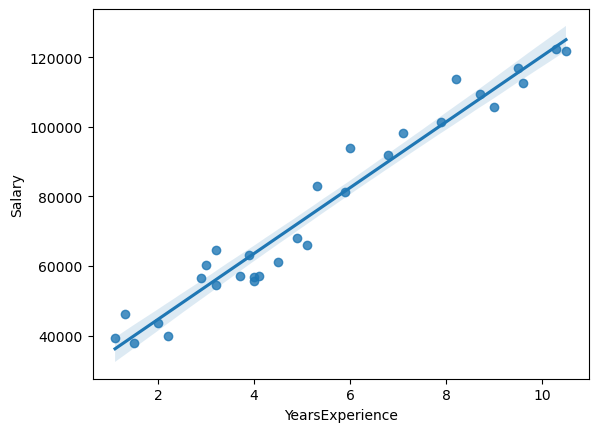

In [75]:
sns.regplot(x='YearsExperience',y='Salary',data=sh);

# Model Building

In [76]:
model2=smf.ols('Salary~YearsExperience',data=sh).fit()

In [77]:
# parameters
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [78]:
# finding t-values and p-values
model2.tvalues, model2.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [79]:
# rsquared values
model2.rsquared

0.9569566641435086

In [80]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        13:43:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using Transformations

In [86]:
model2_1=smf.ols('np.log(Salary)~YearsExperience',data=sh).fit()
model2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           7.03e-18
Time:                        13:47:05   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model2_1.rsquared

0.9319671194084196

In [89]:
model2_01=smf.ols('np.log(Salary)~np.log(YearsExperience)',data=sh).fit()
model2_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           7.40e-16
Time:                        13:47:57   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model2_01.rsquared

0.905215072581715

In [92]:
model2.rsquared
# model has the R-squared: 0.95 which is considered to be a good model than other transformations

0.9569566641435086

# Model predicted on YearsExperience

In [93]:
YearsExperience=pd.DataFrame(sh,columns=['YearsExperience'])
model2.predict(YearsExperience).head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64